**Grupo:**
- MATHEUS VYNICIUS SILVA JALES
- PAULO HENRIQUE ALMEIDA DE ANDRADE

# Primeira Rede Neural TensorFlow (TF)

## Importando as bibliotecas

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.version.VERSION)

2.15.0


## Conjunto de dados (Dataset)

In [ ]:
# Define alguns dados para treino (xs como entradas e ys como saídas)

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
#o tipo "list" fornece um parâmetro "shape" com o formato da lista, ou seja, quais dimensões
print(xs, xs.shape)
print(ys, ys.shape)

[-1.  0.  1.  2.  3.  4.] (6,)
[-3. -1.  1.  3.  5.  7.] (6,)


## Definindo o Modelo (Arquitetura NN)

In [ ]:
# Define uma rede neuraral (NN) com 1 neurônio
# Para maior informações sobre funções TF: https://www.tensorflow.org/api_docs

model = tf.keras.Sequential(
          [tf.keras.layers.Dense( units=1, input_shape=[1])]
    )

In [ ]:
#mostra um resumo de todas as camadas e parâmetros da NN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Inicialização dos parâmetros padrão**
- kernel_initializer ('ws') => 'glorot_uniform' (Xavier)
- bias_initializer  ('bs') => 'zeros'

-> O objetivo da Xavier Initialization é inicializar os pesos de forma que a variação das ativações seja a mesma em todas as camadas. Essa variação constante ajuda a evitar que o gradiente exploda ou desapareça.

**Visualizando pesos iniciais (parâmetros)**

In [ ]:
model.get_weights() # lista de parâmetros

[array([[-1.041523]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
print("wi = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

wi =  -1.041523
b  =  0.0


## Compilando o Modelo

In [ ]:
# Use stochastic gradient descent (SGD) para otimização e
# o erro quadrático médio como função de perda

model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model.save('my_first_model_no_training.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(model.predict([10.0]))

1/1 [==============================] - 0s 198ms/step
[[-10.41523]]


Inspecionando o Modelo com [Netron](https://netron.app)

In [ ]:
#instalando Netron para executar dentro do colab
!pip install -q netron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.2 MB/s eta 0:00:00


In [ ]:
#visualizar usando Netron
import netron
import portpicker
from google.colab import output

port = portpicker.pick_unused_port()

# Read the model file and start the netron browser.
with output.temporary():
  netron.start('my_first_model_no_training.h5', port, browse=False)

output.serve_kernel_port_as_iframe(port, height='800')

<IPython.core.display.Javascript object>

## Treinamento

In [ ]:
# ajustar o modelo aos dados (também conhecido como treinar o modelo)

history = model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 412ms/step - loss: 39.6716
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 31.5653
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 25.1803
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 20.1499
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 16.1852
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 13.0592
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 10.5931
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 8.6463
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 7.1083
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 5.8919
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 4.9288
Epoch 12/500
1/1 [==============================] - 0s 9ms/step - loss: 4.1651
Epoch 13/500
1/1 [==============================

Inspecionando o Modelo

In [ ]:
print("wi = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

wi =  1.9967707
b  =  -0.989988


In [ ]:
# Salvando o Modelo treinado
model.save('my_first_model_trained.h5')

In [ ]:
#visualizando o modelo treinado no netron
port = portpicker.pick_unused_port()

# Read the model file and start the netron browser.
with output.temporary():
  netron.start('my_first_model_trained.h5', port, browse=False)

output.serve_kernel_port_as_iframe(port, height='800')

<IPython.core.display.Javascript object>

## Testando o Modelo

In [ ]:
# Predizer a saída de um novo dado (Inferência)

print(model.predict([10.0]))

1/1 [==============================] - 0s 154ms/step
[[18.977718]]


In [ ]:
type(history.history)

dict

In [ ]:
history.history.keys()

dict_keys(['loss'])

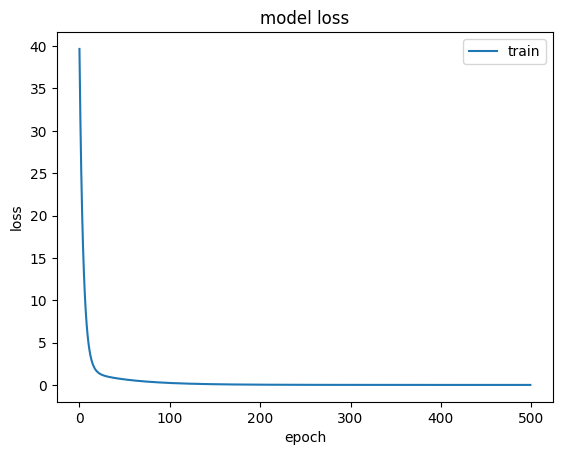

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
history.history['loss']

[39.67155075073242,
 31.56525421142578,
 25.18034553527832,
 20.149892807006836,
 16.18520736694336,
 13.059163093566895,
 10.593055725097656,
 8.646294593811035,
 7.108264446258545,
 5.8919358253479,
 4.928834915161133,
 4.165088653564453,
 3.5583083629608154,
 3.0751419067382812,
 2.6893484592437744,
 2.380279302597046,
 2.1316871643066406,
 1.9307861328125,
 1.76751708984375,
 1.6339607238769531,
 1.5238865613937378,
 1.4323891401290894,
 1.3556078672409058,
 1.2905031442642212,
 1.2346810102462769,
 1.1862568855285645,
 1.1437454223632812,
 1.1059765815734863,
 1.0720278024673462,
 1.0411714315414429,
 1.0128332376480103,
 0.9865594506263733,
 0.9619917869567871,
 0.9388465881347656,
 0.9168985486030579,
 0.8959693908691406,
 0.8759168982505798,
 0.8566279411315918,
 0.8380119204521179,
 0.8199957013130188,
 0.8025209307670593,
 0.7855396270751953,
 0.7690131068229675,
 0.7529094815254211,
 0.7372023463249207,
 0.7218692302703857,
 0.7068919539451599,
 0.6922540664672852,
 0.677942

# Questão 1

## Criação e treinamento das redes neurais

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define alguns dados para treino (xs como entradas e ys como saídas)

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
# Criando as redes neurais

A1M1 = tf.keras.Sequential(
          [tf.keras.layers.Dense( units=1, input_shape=[1])]
    )
A1M2 = tf.keras.Sequential(
          [tf.keras.layers.Dense( units=1, input_shape=[1])]
    )

A1M3 = tf.keras.Sequential(
          [tf.keras.layers.Dense( units=1, input_shape=[1])]
    )

# Compilando

A1M1.compile(optimizer='sgd', loss='mean_squared_error')
A1M2.compile(optimizer='sgd', loss='mean_squared_error')
A1M3.compile(optimizer='sgd', loss='mean_squared_error')

# RedeNeural1.save('Questao1.h5')

A1M1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Criando classe (Em desenvolvimento)
class RedeNeural:
  def __init__(self, kernel = None, nome = None, wi = None, b = None) -> None:
    self.nome = nome
    self.wi = wi
    self.b = b
    self.kernel = kernel

  def setValues(self):
    self.wi = self.get_weights()[0][0][0]
    self.b = A1M1.get_weights()[1][0]

In [ ]:
# Criando o dicionário de weights e bias

modelosA1 = {
  "A1M1": {
    "wi": None,
    "b": None
  },
  "A1M2": {
    "wi": None,
    "b": None
  },
  "A1M3": {
    "wi": None,
    "b": None
  }
}

# Treinando as redes neurais

A1M1_History = A1M1.fit(xs, ys, epochs=100, verbose=0)
modelosA1["A1M1"]["wi"] = A1M1.get_weights()[0][0][0]
modelosA1["A1M1"]["b"] = A1M1.get_weights()[1][0]

A1M2_History = A1M2.fit(xs, ys, epochs=300, verbose=0)
modelosA1["A1M2"]["wi"] = A1M2.get_weights()[0][0][0]
modelosA1["A1M2"]["b"] = A1M2.get_weights()[1][0]

A1M3_History = A1M3.fit(xs, ys, epochs=500, verbose=0)
modelosA1["A1M3"]["wi"] = A1M3.get_weights()[0][0][0]
modelosA1["A1M3"]["b"] = A1M3.get_weights()[1][0]

predictA1M1 = A1M1.predict([10.0])
predictA1M2 = A1M2.predict([10.0])
predictA1M3 = A1M3.predict([10.0])

1/1 [==============================] - 0s 57ms/step


## Análises gráficas de cada modelo

Comparação de cada $w_i$ e $b$ gerados pelos modelos

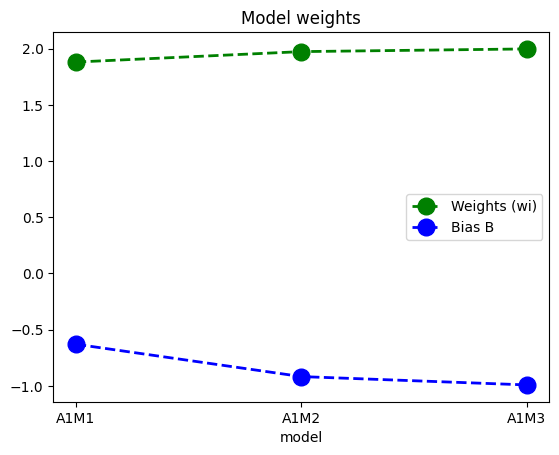

In [ ]:
weights = [modelosA1["A1M1"]["wi"], modelosA1["A1M2"]["wi"], modelosA1["A1M3"]["wi"]]
bias = [modelosA1["A1M1"]["b"], modelosA1["A1M2"]["b"], modelosA1["A1M3"]["b"]]

plt.plot(modelosA1.keys(), weights, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'Weights (wi)')
plt.plot(modelosA1.keys(), bias, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'Bias B')
plt.title('Model weights')
plt.xlabel('model')
plt.legend(loc="best")
plt.show()

Comparação das previsões de cada modelo

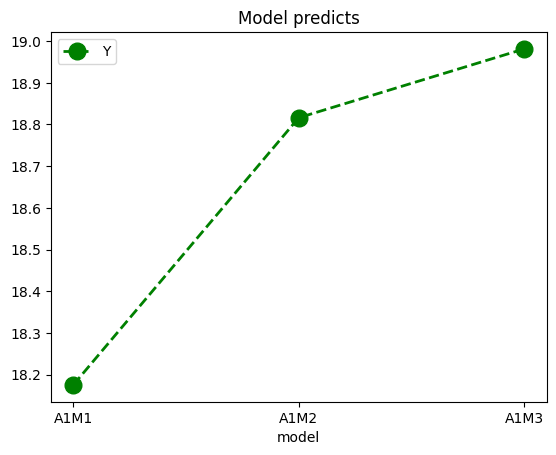

In [ ]:
plt.plot(modelosA1.keys(), [predictA1M1[0], predictA1M2[0], predictA1M3[0]], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'Y')
plt.title('Model predicts')
plt.xlabel('model')
plt.legend(loc="best")
plt.show()

## Conclusão

Observamos que o número de épocas no treinamento de redes neurais é crucial e traz consequência tanto para o tempo computacional, quanto para a capacidade do modelo de alcançar resultados mais precisos.

Além disso, sabemos que o treinamento de redes neurais é um processo iterativo, em que o modelo é ajustado gradualmente para minimizar a perda. Por isso, modelos treinados por mais tempo tendem a ter uma melhor capacidade de generalização.

# Questão 2

## Criação e treinamento das redes neurais

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define alguns dados para treino (xs como entradas e ys como saídas)

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Adaptando o xs para o shape correto
xs = np.array([[-1.0, -1.0], [0.0, 0.0], [1.0, 1.0], [2.0, 2.0], [3.0, 3.0], [4.0, 4.0]], dtype=float)

In [ ]:
# Criando as redes neurais

A2M1 = tf.keras.Sequential(
          [tf.keras.layers.Dense(1, input_shape=[2])]
    )

A2M2 = tf.keras.Sequential(
          [tf.keras.layers.Dense(1, input_shape=[2])]
    )

A2M3 = tf.keras.Sequential(
          [tf.keras.layers.Dense(1, input_shape=[2])]
    )

# Compilando

A2M1.compile(optimizer='sgd', loss='mean_squared_error')
A2M2.compile(optimizer='sgd', loss='mean_squared_error')
A2M3.compile(optimizer='sgd', loss='mean_squared_error')

A2M1.save("A2M1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install netron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00


In [ ]:
#visualizar usando Netron
import netron
import portpicker
from google.colab import output

port = portpicker.pick_unused_port()

# Read the model file and start the netron browser.
with output.temporary():
  netron.start('A2M1.h5', port, browse=False)

output.serve_kernel_port_as_iframe(port, height='800')

<IPython.core.display.Javascript object>

In [ ]:
# Criando o dicionário de weights e bias

modelosA2 = {
  "A2M1": {
    "wi": None,
    "b": None
  },
  "A2M2": {
    "wi": None,
    "b": None
  },
  "A2M3": {
    "wi": None,
    "b": None
  }
}

# Treinando as redes neurais

A2M1_History = A2M1.fit(xs, ys, epochs=100, verbose=0)
modelosA2["A2M1"]["wi"] = A2M1.get_weights()[0][0][0] + A2M1.get_weights()[0][1][0]
modelosA2["A2M1"]["b"] = A2M1.get_weights()[1][0]

A2M2_History = A2M2.fit(xs, ys, epochs=300, verbose=0)
modelosA2["A2M2"]["wi"] = A2M2.get_weights()[0][0][0] + A2M2.get_weights()[0][1][0]
modelosA2["A2M2"]["b"] = A2M2.get_weights()[1][0]

A2M3_History = A2M3.fit(xs, ys, epochs=500, verbose=0)
modelosA2["A2M3"]["wi"] = A2M3.get_weights()[0][0][0] + A2M3.get_weights()[0][1][0]
modelosA2["A2M3"]["b"] = A2M3.get_weights()[1][0]

valor = np.array([[10.0, 10.0]])

predictA2M1 = A2M1.predict(valor)
predictA2M2 = A2M2.predict(valor)
predictA2M3 = A2M3.predict(valor)

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step


## Análises gráficas de cada modelo

Comparação de cada $w_i$ e $b$ gerados pelos modelos

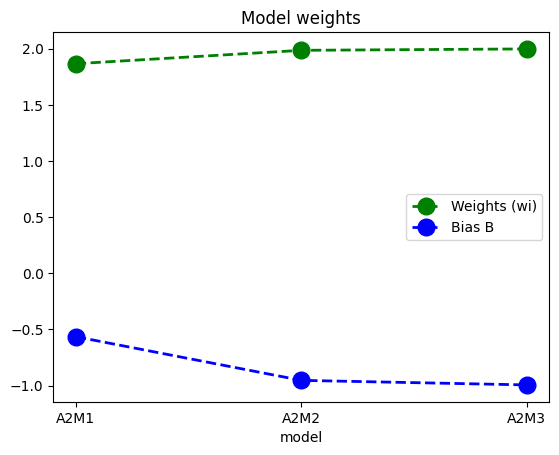

In [ ]:
weights = [modelosA2["A2M1"]["wi"], modelosA2["A2M2"]["wi"], modelosA2["A2M3"]["wi"]]
bias = [modelosA2["A2M1"]["b"], modelosA2["A2M2"]["b"], modelosA2["A2M3"]["b"]]

plt.plot(modelosA2.keys(), weights, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'Weights (wi)')
plt.plot(modelosA2.keys(), bias, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'Bias B')
plt.title('Model weights')
plt.xlabel('model')
plt.legend(loc="best")
plt.show()

Comparação das previsões de cada modelo

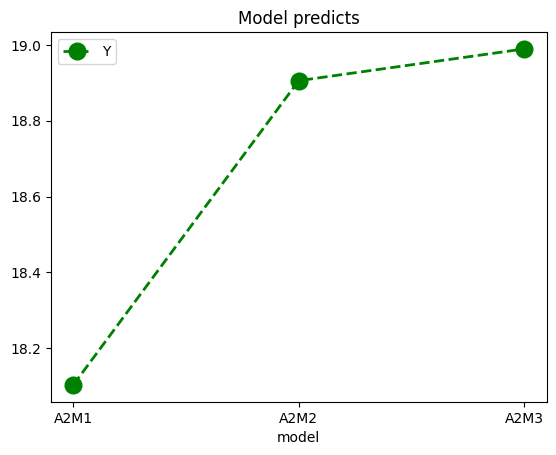

In [ ]:
plt.plot(modelosA2.keys(), [predictA2M1[0], predictA2M2[0], predictA2M3[0]], color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label = 'Y')
plt.title('Model predicts')
plt.xlabel('model')
plt.legend(loc="best")
plt.show()

## Comparação entre as arquiteturas

**Obs.:** Os códigos da Questão 1 devem ser executados para que as comparações entre os modelos possam ser realizadas

In [ ]:
modelos = {**modelosA1, **modelosA2}

In [ ]:
modelos

{'A1M1': {'wi': 1.8805097, 'b': -0.62954426},
 'A1M2': {'wi': 1.9733609, 'b': -0.9174098},
 'A1M3': {'wi': 1.9972782, 'b': -0.9915615},
 'A2M1': {'wi': 1.8668313, 'b': -0.56529933},
 'A2M2': {'wi': 1.9859803, 'b': -0.9542356},
 'A2M3': {'wi': 1.9984145, 'b': -0.99482423}}

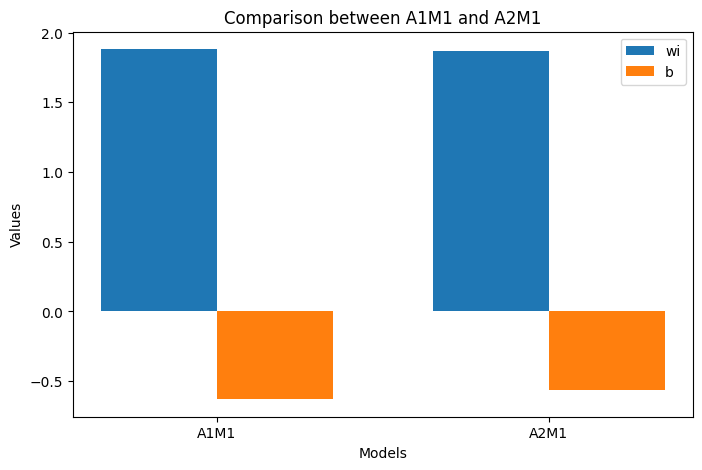

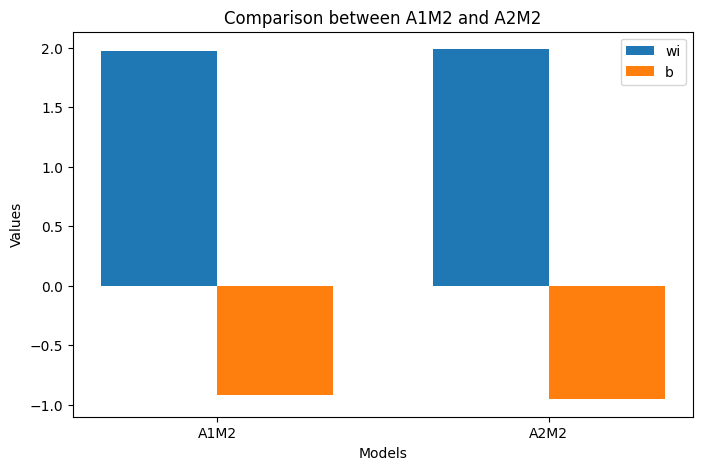

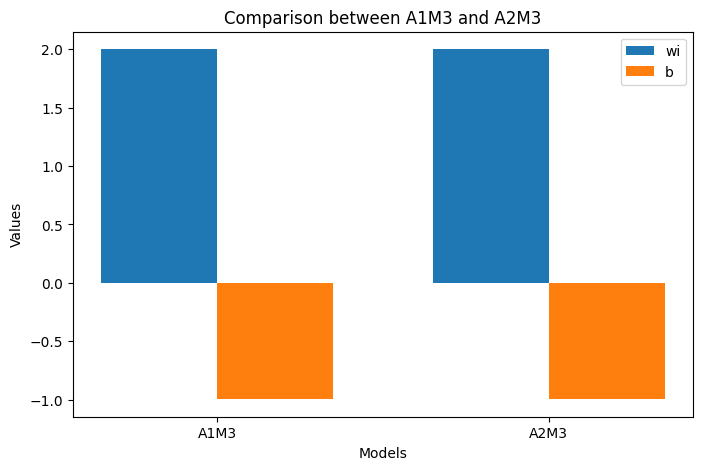

In [ ]:
# Pares de arquitetura para comparar
model_pairs = [("A1M1", "A2M1"), ("A1M2", "A2M2"), ("A1M3", "A2M3")]

# Gráficos de barras agrupado
for pair in model_pairs:
    model1, model2 = pair

    # Extração dos dados
    model_names = [model1, model2]
    wi_values = [modelos[model][ "wi"] for model in model_names]
    b_values = [modelos[model]["b"] for model in model_names]

    # Set up de tamanhos e posições
    bar_width = 0.35
    index = np.arange(len(model_names))
    bar1_positions = [i - bar_width/2 for i in index]
    bar2_positions = [i + bar_width/2 for i in index]

    # Criação da fig
    fig, ax = plt.subplots(figsize=(8, 5))

    # Grupos de barras
    ax.bar(bar1_positions, wi_values, width=bar_width, label='wi')
    ax.bar(bar2_positions, b_values, width=bar_width, label='b')

    # Configurações gerais
    ax.set_xlabel('Models')
    ax.set_ylabel('Values')
    ax.set_title(f'Comparison between {model1} and {model2}')
    ax.set_xticks(index)
    ax.set_xticklabels(model_names)
    ax.legend()

    plt.show()

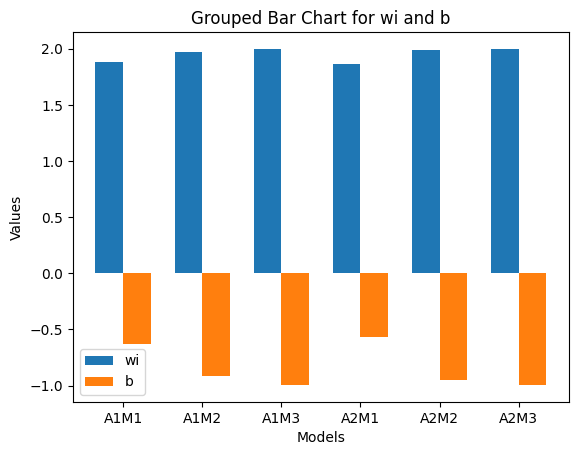

In [ ]:
# Ambos os dois resultados em um único dicionário
modelos = {**modelosA1, **modelosA2}

# Extração dos dados do dicionário 'modelos'
model_names = list(modelos.keys())
wi_values = [modelos[model]["wi"] for model in model_names]
b_values = [modelos[model]["b"] for model in model_names]

# Set up dos tamanhos e posições
bar_width = 0.35
index = range(len(model_names))
bar1_positions = [i - bar_width/2 for i in index]
bar2_positions = [i + bar_width/2 for i in index]

# Criação dos grupos de barras
plt.bar(bar1_positions, wi_values, width=bar_width, label='wi')
plt.bar(bar2_positions, b_values, width=bar_width, label='b')

# Configurações gerais
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Grouped Bar Chart for wi and b')
plt.xticks(index, model_names)
plt.legend()

# Step 5: Show the chart
plt.show()

## Conclusão

As arquiteturas diferem pouco na sua precisão. Na segunda arquitetura, adicionar um novo neurônio na camada de input se mostrou um pouco mais eficiente em relação à precisão na estimativa dos pesos.

No fim das contas, ambas as arquiteturas convergiram pra uma previsão de $19$ ao receber o valor $10$ como input, mostrando que o aumento de épocas é, neste caso, mais relevante do que a repetição dos dados de input através do aumento de neurônios.